In [33]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import sklearn
from sklearn import datasets
import scipy
import cv2

In [34]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = 'cpu'
print(device)

cuda


In [35]:
faces = datasets.fetch_olivetti_faces()

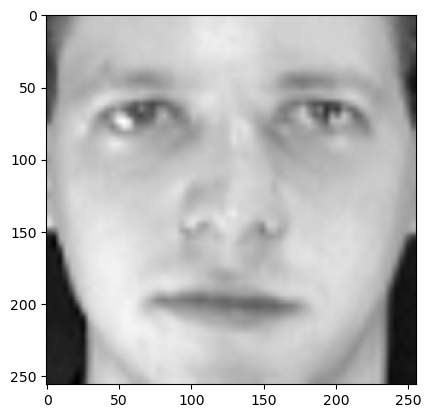

In [70]:
image = faces.images[0,:]
face = cv2.resize(image,(256,256))
plt.figure()
plt.imshow(face,cmap='gray')
plt.show()

(256, 256)


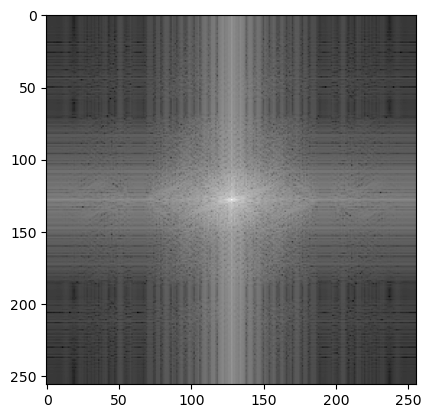

In [71]:
fft = scipy.fft.fft2(face)
shifted = scipy.fft.fftshift(fft)
plot = np.log(np.abs(shifted)**2)
print(fft.shape)
plt.figure()
plt.imshow(plot,cmap='gray')
plt.show()

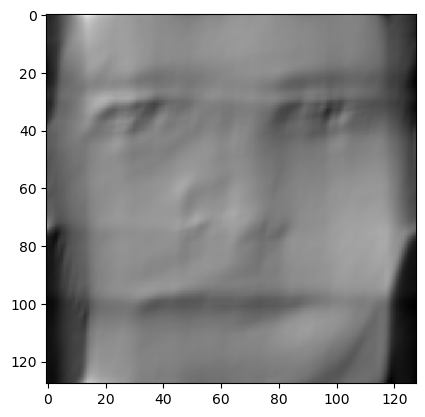

In [80]:
val = scipy.fft.ifft2(fft[:128,:128])
# val = scipy.fft.ifft2(scipy.fft.ifftshift(cv2.resize(shifted,(32,32))))
plt.imshow(abs(val),cmap='gray')

In [38]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1,3)
        self.fc1 = nn.Linear(1, 200)
        self.fc2 = nn.Linear(200, 900)
        self.fc3 = nn.Linear(900, 1)

        self.i = 1j

        self.optimizer = torch.optim.Adam(self.parameters(),lr=1e-3)

        self.itstart = 1
        self.itend = 0

    def forward(self, x):
        x = F.tanh(self.fc1(x))
        x = torch.sin(x)
        x = F.tanh(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def loss_fn(self,predictions,targets):
        return torch.mean((predictions-targets)**2)
    
    
    def train(self,x,y,epochs):
        self.itstart = self.itend+1
        self.itend += epochs+1
        for epoch in range(self.itstart,self.itend):
            predictions = self.forward(x)
            loss = self.loss_fn(predictions,y)
            loss.backward()
            self.optimizer.step()
            self.optimizer.zero_grad()
            if epoch % 10000 == 0:
                print("Epoch:",epoch,"\t Loss:", loss.item())
    def plot(self,x,target):
        y = self.forward(x)
        plt.figure()
        plt.plot(x.detach().cpu().numpy(),y.detach().cpu().numpy(),label = 'predicted')
        plt.plot(x.detach().cpu().numpy(),target,label='targets')
        plt.legend()
        plt.show()


net = Net()
net.to(device)
print(net)

TypeError: Conv2d.__init__() missing 1 required positional argument: 'kernel_size'